# 🌲 NEURO-ESTATE OS: Интерактивная Симуляция
### *Ancestral Estate 2.0: Where Tradition Meets Singularity*

> **"Мы не строим деревни. Мы проектируем будущее среды обитания человека."**

Этот ноутбук позволяет вам запустить экономическую модель "Агро-Полиса" прямо в браузере. Вы сможете увидеть, как инвестиции в технологии (ИИ, Дроны, Префабы) превращают гектар земли в высокодоходный актив.

---
### 🚀 Как использовать:
1.  Нажимайте `Shift + Enter`, чтобы запускать ячейки по очереди.
2.  Следите за выводом под ячейками.
3.  В конце вы получите финансовый отчет и вердикт ИИ.

In [1]:
# 1. Импорт библиотек и настройка
import time
import random
import sys
from dataclasses import dataclass, field
from typing import Dict, List, Optional
from enum import Enum
import matplotlib.pyplot as plt # Добавили для графиков

# Настройка цветов для вывода в ноутбуке (эмуляция терминала)
class TerminalColors:
    HEADER = '\033[95m'
    BLUE = '\033[94m'
    CYAN = '\033[96m'
    GREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

def cprint(text: str, color: str = TerminalColors.ENDC, end: str = "\n"):
    """Print colored text."""
    print(f"{color}{text}{TerminalColors.ENDC}", end=end)

print("✅ Библиотеки загружены. Система готова к инициализации.")

✅ Библиотеки загружены. Система готова к инициализации.


### 2. Конфигурация и Структуры Данных
Здесь мы определяем ключевые параметры модели:
*   **TechLevel:** Уровни технологического развития (от ручного труда до роя дронов).
*   **EstateConfig:** Параметры вашего поместья.
*   **FinancialReport:** Структура годового отчета.

In [2]:
class TechLevel(Enum):
    BASIC = 1       # Ручной труд, 4G интернет (Manual labor)
    ADVANCED = 2    # Автоматизация, Starlink, Солнечные панели (Automation)
    FUTURISTIC = 3  # AI-Агро дроны, 3D-печать, DAO управление (AI Swarm)

@dataclass
class EstateConfig:
    family_name: str
    region: str
    initial_capital: float
    tech_level: TechLevel = TechLevel.BASIC

@dataclass
class FinancialReport:
    year: int
    revenue: float
    expenses: float
    net_income: float
    capital_valuation: float
    events: List[str]

print("✅ Структуры данных определены.")

✅ Структуры данных определены.


### 3. Ядро Симуляции (The Kernel)
Это "мозг" нашей операционной системы. Класс `NeuroEstateKernel` управляет:
*   **Активами:** Земля, Экосистема, Человеческий капитал.
*   **Экономикой:** Доходы от удаленки, агро-бизнеса и туризма.
*   **Событиями:** Случайные факторы ("Черные лебеди").

In [3]:
class NeuroEstateKernel:
    """
    Ядро симуляции. Рассматривает поместье как программируемый класс активов.
    (The core simulation engine. Treats the estate as a programmable asset class.)
    """
    
    def __init__(self, config: EstateConfig):
        self.config = config
        self.year = 0
        
        # Капитальные Активы (Баланс) / Capital Assets
        self.assets = {
            "land_infrastructure": 0.0,      # Материальные активы (Tangible)
            "ecosystem_services": 100_000.0, # Природный капитал (Natural Capital)
            "human_capital": 500_000.0,      # Человеческий капитал (Human Capital)
            "social_capital": 50_000.0,      # Социальный капитал (Social Capital)
            "crypto_reserves": 0.0           # Ликвидные активы (Liquid assets)
        }
        
        self.history: List[FinancialReport] = []
        self._initialize_system()

    def _initialize_system(self):
        """Bootstrapping the estate infrastructure."""
        cprint(f"\n[СИСТЕМА] Инициализация NEURO-ESTATE для семьи {self.config.family_name}...", TerminalColors.BLUE)
        time.sleep(0.5)
        
        # CAPEX (Капитальные затраты)
        capex = {
            "land_lease_99yr": 300_000,       # Аренда земли 99 лет
            "prefab_module_45m": 2_500_000,   # Модульный дом (Prefab)
            "smart_grid_share": 400_000,      # Доля в энергосети
            "agri_bot_starter": 200_000,      # Агро-бот (старт)
            "runway_contribution": 100_000    # Взнос на ВПП (Aviation)
        }
        
        total_capex = sum(capex.values())
        self.assets["land_infrastructure"] = total_capex
        self.config.initial_capital -= total_capex
        
        cprint(f"├── 🏗️  Развертывание модульного дома (Prefab)... OK", TerminalColors.GREEN)
        cprint(f"├── 🛰️  Подключение узла Starlink/5G... OK", TerminalColors.GREEN)
        cprint(f"├── ✈️  Картирование ВПП и маршрутов дронов (Sky Mobility)... OK", TerminalColors.GREEN)
        cprint(f"└── 💳  Минтинг токенов управления DAO (Governance)... OK", TerminalColors.GREEN)
        
        cprint(f"\n[ФИНАНСЫ] Общий CAPEX: {total_capex:,.0f} RUB", TerminalColors.WARNING)
        cprint(f"[СТАТУС] Система онлайн. Симуляция запущена.", TerminalColors.BOLD)

    def _generate_random_event(self, year: int) -> tuple[float, str]:
        """Симуляция черных лебедей и золотых гусей."""
        events = [
            (0.1, "🌪️  Легкая засуха (Агро урожай -10%)", -50_000),
            (0.1, "📈  Crypto Bull Run (Накопления +20%)", 150_000),
            (0.05, "🦄  Экзит стартапа (Статус Единорога!)", 5_000_000),
            (0.2, "🦠  Новый вирус (Локдаун в городе, Ценность поместья +++)", 0), 
            (0.3, "🎥  Вирусный TikTok о вашем поместье (Туризм +++)", 200_000),
            (0.25, "🧘  Ничего особенного, просто счастье (Just happiness)", 0)
        ]
        
        if random.random() > 0.7:
            evt = random.choice(events)
            return evt[2], evt[1]
        return 0, ""

    def run_year(self):
        self.year += 1
        tech_multiplier = 1.0
        
        # Логика техно-апгрейдов
        if self.year == 3:
            self.config.tech_level = TechLevel.ADVANCED
            cprint(f"\n[UPGRADE] ⚡ Система обновлена до ADVANCED (Солнце + Автоматизация)", TerminalColors.CYAN)
            tech_multiplier = 1.2
        elif self.year == 7:
            self.config.tech_level = TechLevel.FUTURISTIC
            cprint(f"\n[UPGRADE] 🤖 Система обновлена до FUTURISTIC (Рой ИИ + 3D-печать)", TerminalColors.CYAN)
            tech_multiplier = 1.5

        # Потоки доходов (Revenue Streams)
        # Базовый доход растет с инфляцией и опытом
        remote_work = 1_800_000 * (1.05 ** self.year) 
        
        # Агро-доход зависит от уровня технологий
        organic_sales = 600_000 * (1.1 ** self.year) * tech_multiplier if self.year > 1 else 0
        
        # Эко-услуги (Карбоновые кредиты)
        carbon_credits = 180_000 * (1.15 ** self.year) if self.year > 3 else 0
        
        # Туризм и Образование
        tourism = 720_000 * (1.1 ** self.year) * tech_multiplier if self.year > 2 else 0
        
        revenue = remote_work + organic_sales + carbon_credits + tourism
        
        # Расходы (Дефляционные благодаря автономии!)
        base_expense = 1_200_000
        autonomy_discount = min(0.5, 0.02 * self.year * tech_multiplier) # Макс скидка 50%
        expenses = base_expense * (1 - autonomy_discount) * (1.03 ** self.year) 
        
        # Случайные события
        event_impact, event_desc = self._generate_random_event(self.year)
        revenue += event_impact
        
        net_income = revenue - expenses
        self.assets["crypto_reserves"] += net_income
        
        # Рост стоимости активов (HODL effect)
        self.assets["land_infrastructure"] *= 1.08 # Недвижимость
        self.assets["ecosystem_services"] *= 1.12  # Природа восстанавливается
        self.assets["human_capital"] *= 1.05       # Здоровье улучшается
        self.assets["social_capital"] *= 1.10      # Сообщество растет
        
        total_valuation = sum(self.assets.values())
        
        report = FinancialReport(
            year=self.year,
            revenue=revenue,
            expenses=expenses,
            net_income=net_income,
            capital_valuation=total_valuation,
            events=[event_desc] if event_desc else []
        )
        self.history.append(report)
        return report

print("✅ Ядро симуляции загружено.")

✅ Ядро симуляции загружено.


### 4. Запуск Симуляции
Введите параметры ниже и запустите ячейку, чтобы увидеть будущее.

In [4]:
# --- ПАРАМЕТРЫ СИМУЛЯЦИИ ---
FAMILY_NAME = "Sokolov"  # Введите вашу фамилию
YEARS = 15               # Горизонт планирования (лет)
# ---------------------------

print("\n" * 2)
cprint("   🌲 NEURO-ESTATE SIMULATION v2.5   ", TerminalColors.HEADER)
cprint("   =================================   ", TerminalColors.HEADER)
print("   Загрузка Ядра (Initializing Kernel)... [OK]")
print("   Загрузка Экономических Моделей (Loading Models)... [OK]")
print("   Подключение к Глобальному DAO (Connecting to DAO)... [OK]")
print("\n")

# Config
config = EstateConfig(
    family_name=FAMILY_NAME,
    region="Central Russia",
    initial_capital=10_000_000 # Виртуальная кредитная линия
)

kernel = NeuroEstateKernel(config)

# Simulation Loop
print("\n")
cprint(f"{'ГОД':<5} | {'ВЫРУЧКА (REV)':<15} | {'ЧИСТАЯ ПРИБЫЛЬ':<16} | {'АКТИВЫ (ASSETS)':<18} | {'СОБЫТИЕ (EVENT)'}", TerminalColors.BLUE)
print("-" * 95)

for y in range(YEARS):
    # time.sleep(0.1) # Убрали задержку для ноутбука
    report = kernel.run_year()
    
    event_str = report.events[0] if report.events else ""
    
    income_color = TerminalColors.GREEN if report.net_income > 0 else TerminalColors.FAIL
    
    print(f"{report.year:<5} | "
            f"{report.revenue/1e6:6.1f}M RUB      | "
            f"{income_color}{report.net_income/1e6:6.1f}M RUB{TerminalColors.ENDC}      | "
            f"{report.capital_valuation/1e6:6.1f}M RUB         | "
            f"{event_str}")

# Final Report
print("\n")
cprint("✨ СИМУЛЯЦИЯ ЗАВЕРШЕНА. ГЕНЕРАЦИЯ ОТЧЕТА...", TerminalColors.HEADER)

final_assets = kernel.assets
total_value = sum(final_assets.values())
roi = (total_value - 4_000_000) / 4_000_000 * 100 

print("-" * 60)
cprint(f"🏆 СЕМЬЯ (FAMILY): {FAMILY_NAME.upper()}", TerminalColors.BOLD)
cprint(f"📅 СРОК (TIMEFRAME): {YEARS} Лет (Years)", TerminalColors.BOLD)
print("-" * 60)

cprint(f"💰 ОБЩАЯ СТОИМОСТЬ АКТИВОВ: {total_value:,.0f} RUB", TerminalColors.GREEN)
cprint(f"📈 ROI (Возврат инвестиций): {roi:.1f}%", TerminalColors.CYAN)
print("-" * 60)

print("СТРУКТУРА АКТИВОВ (ASSET BREAKDOWN):")
print(f"  🏡 Недвижимость и Инфра (Real Estate): {final_assets['land_infrastructure']:,.0f}")
print(f"  🌳 Природный Капитал (Natural Capital): {final_assets['ecosystem_services']:,.0f}")
print(f"  🧠 Человеческий Капитал (Human Capital): {final_assets['human_capital']:,.0f}")
print(f"  💳 Крипто/Кэш Резервы (Crypto Reserves): {final_assets['crypto_reserves']:,.0f}")

print("\n")
cprint("🔮 ВЕРДИКТ ИИ (AI VERDICT):", TerminalColors.HEADER)
print("Модель показывает, что 'Родовое Поместье 2.0' — это не дауншифтинг,")
print("а высокодоходный венчурный актив. Сочетая низкие расходы на жизнь")
print("с хай-тек доходами, вы достигаете финансовой сингулярности к 7-му году.")
print("\n> Добро пожаловать в будущее. С возвращением домой.")
print("\n")




   🌲 NEURO-ESTATE SIMULATION v2.5   
   Загрузка Ядра (Initializing Kernel)... [OK]
   Загрузка Экономических Моделей (Loading Models)... [OK]
   Подключение к Глобальному DAO (Connecting to DAO)... [OK]



[СИСТЕМА] Инициализация NEURO-ESTATE для семьи Sokolov...
├── 🏗️  Развертывание модульного дома (Prefab)... OK
├── 🛰️  Подключение узла Starlink/5G... OK
├── ✈️  Картирование ВПП и маршрутов дронов (Sky Mobility)... OK
└── 💳  Минтинг токенов управления DAO (Governance)... OK

[ФИНАНСЫ] Общий CAPEX: 3,500,000 RUB
[СТАТУС] Система онлайн. Симуляция запущена.


ГОД   | ВЫРУЧКА (REV)   | ЧИСТАЯ ПРИБЫЛЬ   | АКТИВЫ (ASSETS)    | СОБЫТИЕ (EVENT)
-----------------------------------------------------------------------------------------------
1     |    2.0M RUB      |    0.8M RUB      |    5.3M RUB         | 📈  Crypto Bull Run (Накопления +20%)
2     |    2.7M RUB      |    1.5M RUB      |    7.1M RUB         | 

[UPGRADE] ⚡ Система обновлена до ADVANCED (Солнце + Автоматизация)
3     |  

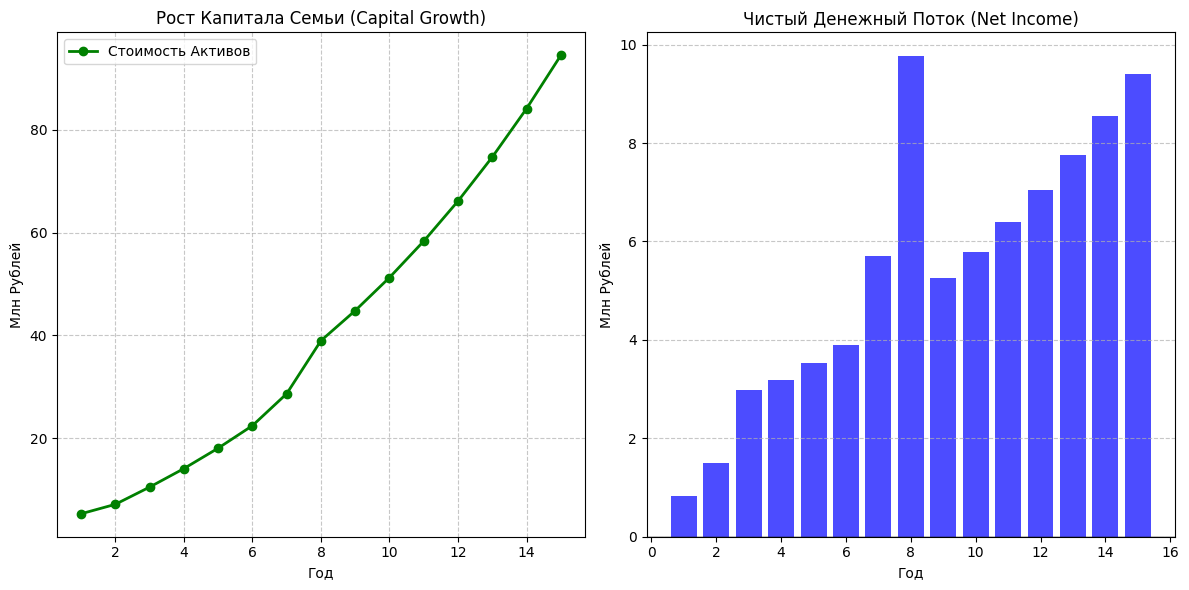


📊 ГРАФИКИ ПОСТРОЕНЫ. Обратите внимание на точку безубыточности (переход красных баров в синие).


In [5]:
# --- ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ (ГРАФИКИ) ---

years_data = [r.year for r in kernel.history]
net_income_data = [r.net_income / 1e6 for r in kernel.history] # В миллионах
valuation_data = [r.capital_valuation / 1e6 for r in kernel.history] # В миллионах

plt.figure(figsize=(12, 6))

# График 1: Рост Капитализации (Valuation)
plt.subplot(1, 2, 1)
plt.plot(years_data, valuation_data, marker='o', color='green', linewidth=2, label='Стоимость Активов')
plt.title('Рост Капитала Семьи (Capital Growth)', fontsize=12)
plt.xlabel('Год')
plt.ylabel('Млн Рублей')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# График 2: Чистая Прибыль (Net Income)
plt.subplot(1, 2, 2)
colors = ['red' if x < 0 else 'blue' for x in net_income_data]
plt.bar(years_data, net_income_data, color=colors, alpha=0.7)
plt.axhline(0, color='black', linewidth=1)
plt.title('Чистый Денежный Поток (Net Income)', fontsize=12)
plt.xlabel('Год')
plt.ylabel('Млн Рублей')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

cprint("\n📊 ГРАФИКИ ПОСТРОЕНЫ. Обратите внимание на точку безубыточности (переход красных баров в синие).", TerminalColors.CYAN)

## 🔗 Связь с проектом

Если у вас есть идеи, вопросы или вы хотите присоединиться к разработке:

*   **Telegram:** [@NeuroLoft](https://t.me/NeuroLoft)
*   **GitHub:** [NeuroLoft/NEURO-ESTATE](https://github.com/NeuroLoft/NEURO-ESTATE)
*   **Email:** vedrusclan@ya.ru

> *© 2025 NeuroLoft. Построено для будущих поколений.*